In [ ]:
from plotnine import *
import pandas as pd

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column'])

# group df by dataset, algorithm, and predicted column name
# find mean of mean squared error
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name', 'FoldID']).mean().reset_index()

# filter where 'Dataset' contains 'log'
log_df = df[df['Dataset'].str.contains('log')]

log_df

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


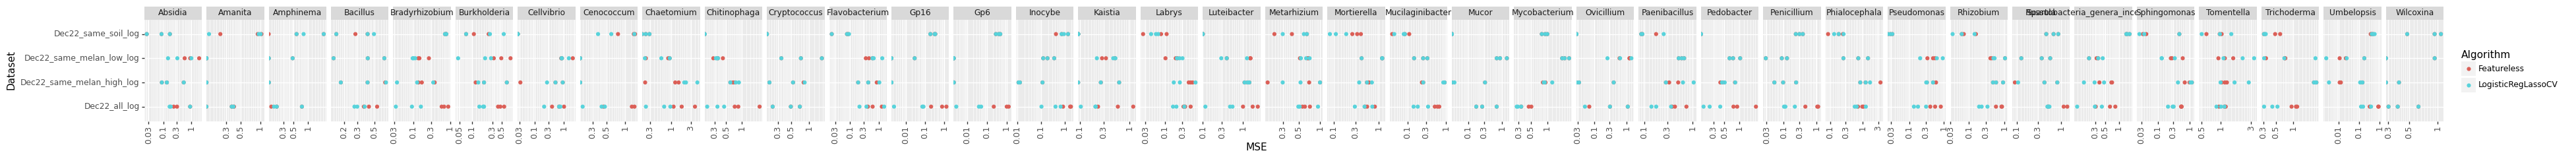

In [10]:

p = ggplot(log_df)
p = p + geom_point(aes(x="Mean Squared Error", y="Dataset", color="Algorithm"))
p = p + facet_grid("~Predicted Column Name", scales="free")
p = p + labs(
    x="MSE", y="Dataset"
)
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(45, 2))
p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "plot.png", dpi=3000)


In [ ]:

p = ggplot(log_df)
p = p + geom_point(aes(x="Test Accuracy", y="Dataset", color="Algorithm"))
p = p + facet_grid("~Predicted Column Name", scales="free")
p = p + labs(x="Accuracy", y="Dataset")
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(45, 2))
# p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "binary_classification.png", dpi=300)

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np

# Generate some random predictions and labels for demonstration
preds = np.random.rand(1000)
labels = np.random.randint(2, size=1000)

# Calculate the fpr, tpr, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(labels, preds)

# Calculate the AUC
auc = metrics.roc_auc_score(labels, preds)

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], 'r--') # Plot the random guess line
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
